# Ejemplo: 32 MOC3D Problem 1 (solo flujo)

**Resumen**. 

Se resuelve un problema de flujo en una dimensión usando los datos del ejemplo descrito en [1]. 

<p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/luiggix/mf6_tutorial/">MODFLOW 6: tutorial</a> (1_flow/01_flow_1D.ipynb) by <b>Luis M. de la Cruz Salas (2025)</b> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a>.</p> 

# Descripción

## Discretización temporal

|Parameter | Value| Units | Variable |
|---:|:---:|:---:|:---|
|Number of stress periods (NPER) | $1$ | | `tdis["nper"]` |
|Total time | $120$ | s | `tdis["perioddata"][0][0]` |
|Number of time steps (NSTP) | $1$ | | `tdis["perioddata"][0][1]` |
|Multiplier (TSMULT)| $1$ | | `tdis["perioddata"][0][2]` |

donde `i` $= 0,\dots,$NPER$-1$. 

## Discretización espacial.

* El modelo de malla consiste de $1$ capa, $120$ columnas y $1$ renglón.
* La longitud del renglón es de $12$ [cm].
* La longitud de la columna es $0.1$ [cm].
* Con la información anterior se calcula el ancho del renglón, `DELC`, y de las columnas, `DELR`, que ambos casos debe ser $0.1$ [cm].
* La parte superior (`TOP`) de la celda es $1.0$ [cm] y la parte inferior (`BOTTOM`) es cero.
* La longitud de la capa es igual a $1.0$ [cm], valor que se calcula de `|TOP - BOTTOM|`.


|Parameter | Value| Units | Variable |
|---:|:---:|:---:|:---|
|Length of system (rows) | $12.0$ | cm | |
|Number of layers | $1$ | | `dis["nlay"]`|
|Number of rows | $1$ | | `dis["nrow"]`|
|Number of columns | $120$ | | `dis["ncol"]`|
|Column width | $0.1$ | cm | `dis["delr"]`|
|Row width | $0.1$ | cm | `dis["delc"]`|
|Top of the model | $1.0$ | cm | `dis["top"]`|
|Layer bottom elevation (cm) | $0$ | cm | `dis["botm"]`|

## Parámetros físicos.

|Parameter | Value| Units | Variable |
|---:|:---:|:---:|:---|
|Specific discharge | $0.1$ | cm s$^{-1}$ | `phys["specific_discharge"]` |
|Hydraulic conductivity | $0.01$ | cm s$^{-1}$ | `phys["hydraulic_conductivity"]` |
|Source concentration | $1.0$ | unitless | `phys["source_concentration"]` |

## Importación de bibliotecas

In [ ]:
#pip install git+https://github.com/luiggix/xmf6

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import flopy
import os
import xmf6

# Parámetros físicos

In [3]:
phys = dict(
    specific_discharge = 0.1,  # Specific discharge ($cm s^{-1}$)
    hydraulic_conductivity = 0.01,  # Hydraulic conductivity ($cm s^{-1}$)
    source_concentration = 1.0,  # Source concentration (unitless)
)
xmf6.nice_print(phys, "Parámetros físicos")


Parámetros físicos
――――――――――――――――――
    specific_discharge = 0.1
hydraulic_conductivity = 0.01
  source_concentration = 1.0
――――――――――――――――――


# Solución del problema.

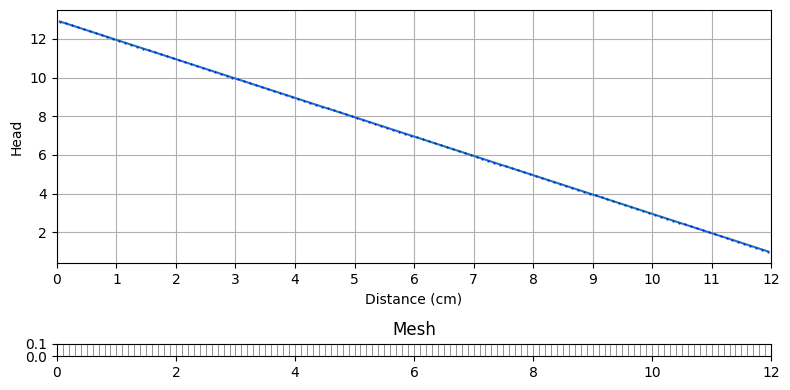

In [5]:
# Parámetros de la simulación (flopy.mf6.MFSimulation)
init = {
    'sim_name' : "flow",
#    'exe_name' : "C:\\Users\\luiggi\\Documents\\GitSites\\mf6_tutorial\\mf6\\windows\\mf6",
    'exe_name' : "../../mf6/macosarm/mf6",
    'sim_ws' : "output_flow_1D"
}

# Parámetros para el tiempo (flopy.mf6.ModflowTdis)
tdis = {
    'units': "seconds",
    'nper' : 1,
    'perioddata': [(120.0, 1, 1.0)]
}

# Parámetros para la solución numérica (flopy.mf6.ModflowIms)
ims = {}

# Parámetros para el modelo de flujo (flopy.mf6.ModflowGwf)
gwf = { 
    'modelname': init["sim_name"],
#    'model_nam_file': f"{init["sim_name"]}.nam",
    'save_flows': True
}

# Parámetros para la discretización espacial (flopy.mf6.ModflowGwfdis)
dis = {
    'length_units' : "centimeters",
    'nlay': 1, 
    'nrow': 1, 
    'ncol': 120,
    'delr': 0.1, 
    'delc': 0.1, 
    'top' : 1.0, 
    'botm': 0.0 
}

# Parámetros para las condiciones iniciales (flopy.mf6.ModflowGwfic)
ic = {
    'strt': 1.0
}

# Parámetros para las condiciones de frontera (flopy.mf6.ModflowGwfchd)
chd = {
    'stress_period_data': [[(0, 0, dis['ncol'] - 1), 1.0]],     
}

# Parámetros para las propiedades de flujo (flopy.mf6.ModflowGwfnpf)
npf = {
    'save_specific_discharge': True,
    'save_saturation': True,
    'icelltype':  0,
    'k': 0.01  # Hydraulic conductivity ($cm s^{-1}$) 
}

phys = dict(
    specific_discharge = 0.1,  # Specific discharge ($cm s^{-1}$)
    hydraulic_conductivity = 0.01,  # Hydraulic conductivity ($cm s^{-1}$)
    source_concentration = 1.0,  # Source concentration (unitless)
)
# Parámetros para las propiedades de los pozos (flopy.mf6.ModflowGwfwel)
phys["specific_discharge"] = 0.1 # Specific discharge ($cm s^{-1}$)
phys["source_concentration"] = 1.0  # Source concentration (unitless)
q = phys["specific_discharge"] * dis['delc'] * dis['delr'] * dis['top']

well = {
    'stress_period_data': [[(0, 0, 0), q, phys["source_concentration"],]],
    'pname': "WEL-1",
    'auxiliary' : ["CONCENTRATION"],
#    'save_flows': True
}

# Parámetros para almacenar y mostrar la salida de la simulación (flopy.mf6.ModflowGwfoc)
oc = {
    'budget_filerecord': f"{init['sim_name']}.bud",
    'head_filerecord': f"{init['sim_name']}.hds",
    'saverecord': [("HEAD", "ALL"), ("BUDGET", "ALL")],
#    'printrecord': [("HEAD", "ALL")]
}

# --- Inicialización de la simulación ---
o_sim = xmf6.common.init_sim(silent = True, init = init, tdis = tdis, ims = ims)
o_gwf, packages = xmf6.gwf.set_packages(o_sim, silent = True,
                                        gwf = gwf, 
                                        dis = dis, ic = ic, chd = chd, npf = npf, oc = oc, well = well)

# --- Escritura de archivos ---
o_sim.write_simulation(silent = True)

# --- Ejecución de la simulación ---
o_sim.run_simulation(silent = True)

# --- Recuperamos los resultados de la simulación ---
head = xmf6.gwf.get_head(o_gwf)
qx, qy, qz, n_q = xmf6.gwf.get_specific_discharge(o_gwf, text="DATA-SPDIS")

x, y, z = o_gwf.modelgrid.xyzcellcenters
row_length = o_gwf.modelgrid.extent[1]

# --- Definición de la figura ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize =(8,4), height_ratios=[2,0.1])

# --- Gráfica 1. ---
#plt.rcParams['font.family'] = 'DeJavu Sans'
ax1.plot(x[0], head[0, 0], marker=".", ls ="-", mec="blue", mfc="none", markersize="1", label = 'Head')
ax1.set_xlim(0, 12)
ax1.set_xticks(ticks=np.linspace(0, row_length,13))
ax1.set_xlabel("Distance (cm)")
ax1.set_ylabel("Head")
ax1.grid()

# --- Gráfica 2. ---
pmv = flopy.plot.PlotMapView(o_gwf, ax=ax2)
pmv.plot_grid(colors='dimgray', lw=0.5)
ax2.set_yticks(ticks=[0, 0.1])#, fontsize=8)
ax2.set_title("Mesh")
plt.tight_layout()
plt.show()

# Referencias

[1] MODFLOW 6 – Example problems, MODFLOW 6 Development Team, with contributions from Chieh Ying Chen and Mike Toews 02/07/2024.**  **32 MOC3D Problem 1**. (Archivo: `mf6examples.pdf` del directorio `doc` de la distribución de MODFLOW 6).